In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder




In [2]:
df = pd.read_csv("realtor-data.zip.csv")


In [4]:
print("Shape: "+str(df.shape))
print("Size: "+str(df.size))
print("\n")
df.head()

Shape: (2226382, 12)
Size: 26716584




,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
df.info()

print("---------------------------------------------------------------------")
print("The dataframe has:", df.shape[0], "rows and ", df.shape[1], "columns", "Size", df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
---------------------------------------------------------------------
The dataframe has: 2226382 rows and  12 columns Size 26716584


In [9]:
# Load your dataset (replace 'your_dataset.csv' with your file path)
# df = pd.read_csv('your_dataset.csv')

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Display the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

# Drop rows with any missing values
df_cleaned = df.dropna()

# Check the shape after dropping rows
print(f"\nOriginal shape: {df.shape}")
print(f"New shape after dropping rows with missing values: {df_cleaned.shape}")


Missing Values in Each Column:
brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

Percentage of Missing Values in Each Column:
brokered_by        0.203604
status             0.000000
price              0.069215
bed               21.618797
bath              22.986666
acre_lot          14.624130
street             0.488056
city               0.063197
state              0.000359
zip_code           0.013430
house_size        25.533983
prev_sold_date    32.981627
dtype: float64

Original shape: (2226382, 12)
New shape after dropping rows with missing values: (1084909, 12)


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084909 entries, 502 to 2226381
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1084909 non-null  float64
 1   status          1084909 non-null  object 
 2   price           1084909 non-null  float64
 3   bed             1084909 non-null  float64
 4   bath            1084909 non-null  float64
 5   acre_lot        1084909 non-null  float64
 6   street          1084909 non-null  float64
 7   city            1084909 non-null  object 
 8   state           1084909 non-null  object 
 9   zip_code        1084909 non-null  float64
 10  house_size      1084909 non-null  float64
 11  prev_sold_date  1084909 non-null  object 
dtypes: float64(8), object(4)
memory usage: 107.6+ MB


In [30]:
df_cleaned.city.info()

<class 'pandas.core.series.Series'>
Index: 1084909 entries, 502 to 2226381
Series name: city
Non-Null Count    Dtype 
--------------    ----- 
1084909 non-null  object
dtypes: object(1)
memory usage: 16.6+ MB


<Figure size 1400x800 with 0 Axes>

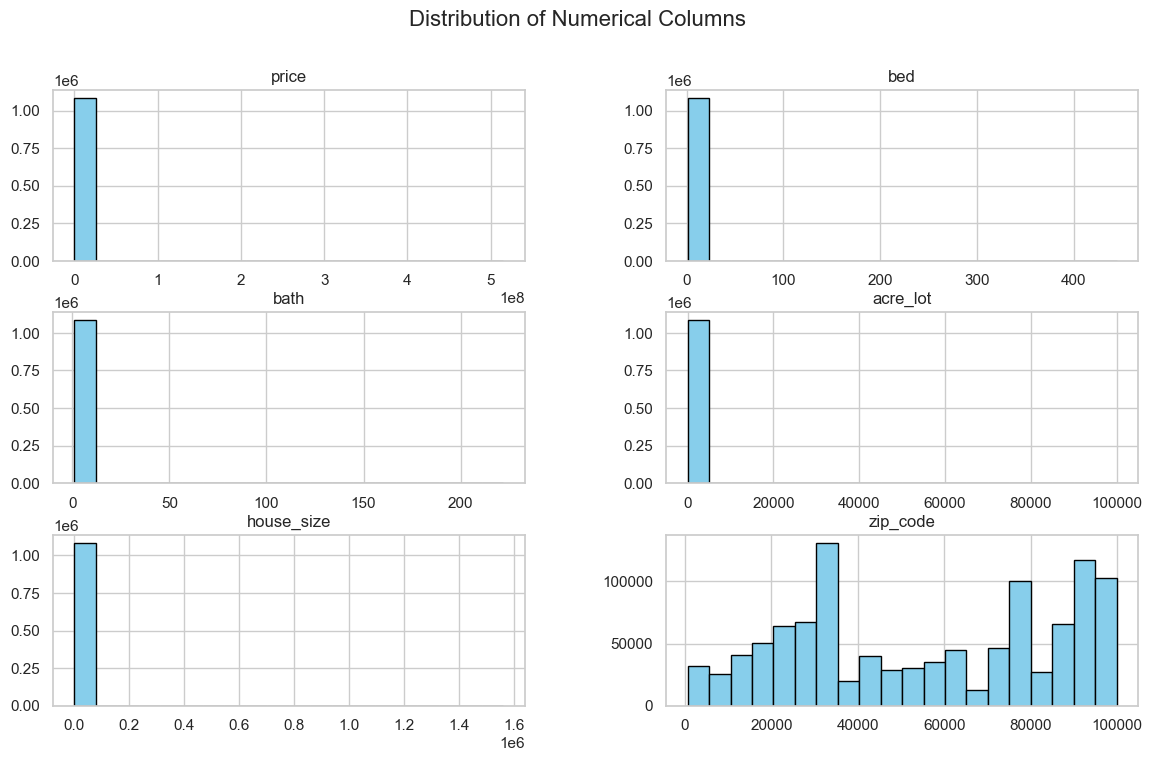

In [13]:
sns.set(style="whitegrid")

# 1. Distribution of Numerical Columns (e.g., price, bed, bath, acre_lot, house_size)
numerical_columns = ['price', 'bed', 'bath', 'acre_lot', 'house_size', 'zip_code']
plt.figure(figsize=(14, 8))
df_cleaned[numerical_columns].hist(bins=20, figsize=(14, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.show()



Missing values in the dataset:
brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


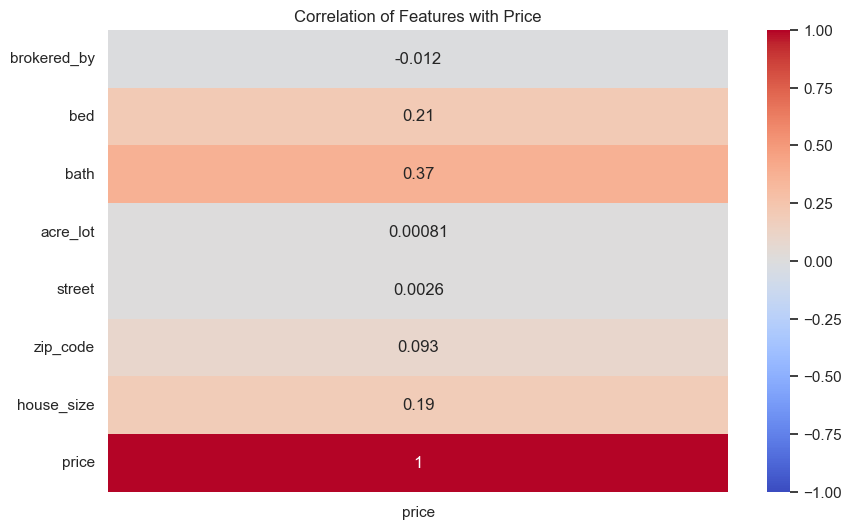

In [15]:
# Step 3: Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(df_cleaned.isnull().sum())

# Step 4: Visualize correlations between numerical features and price
# Exclude categorical columns (status, city, state) from correlation calculation
numerical_columns = ['brokered_by', 'bed', 'bath', 'acre_lot', 'street', 'zip_code', 'house_size']
correlation_matrix = df_cleaned[numerical_columns + ['price']].corr()

# Correlation heatmap between numerical features and price
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Price")
plt.show()


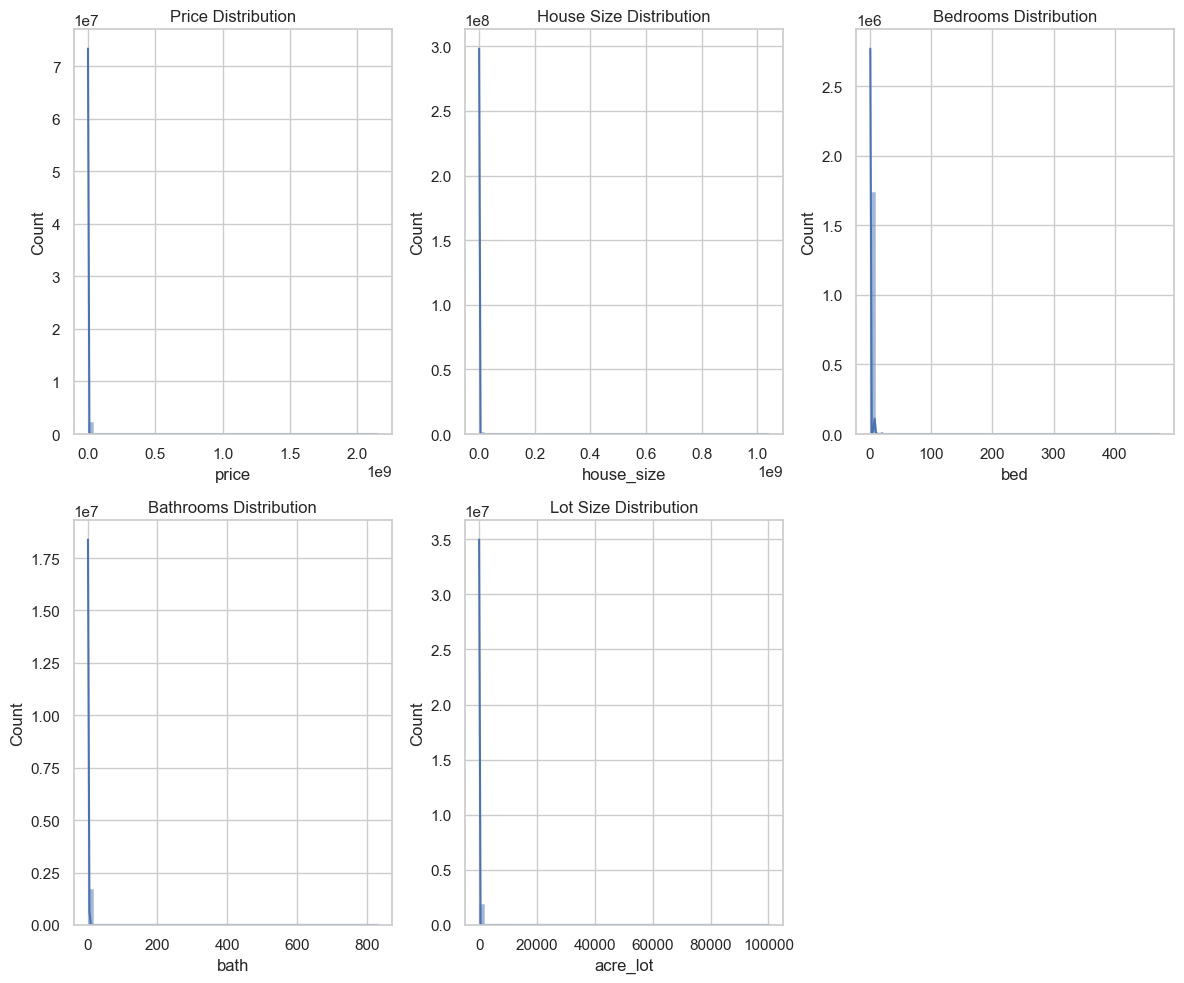

In [17]:
plt.figure(figsize=(12, 10))

# Distribution of price
plt.subplot(2, 3, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Price Distribution')

# Distribution of house_size
plt.subplot(2, 3, 2)
sns.histplot(df['house_size'], kde=True, bins=50)
plt.title('House Size Distribution')

# Distribution of number of bedrooms
plt.subplot(2, 3, 3)
sns.histplot(df['bed'], kde=True, bins=50)
plt.title('Bedrooms Distribution')

# Distribution of number of bathrooms
plt.subplot(2, 3, 4)
sns.histplot(df['bath'], kde=True, bins=50)
plt.title('Bathrooms Distribution')

# Distribution of lot size (acre_lot)
plt.subplot(2, 3, 5)
sns.histplot(df['acre_lot'], kde=True, bins=50)
plt.title('Lot Size Distribution')

# Show all subplots
plt.tight_layout()
plt.show()


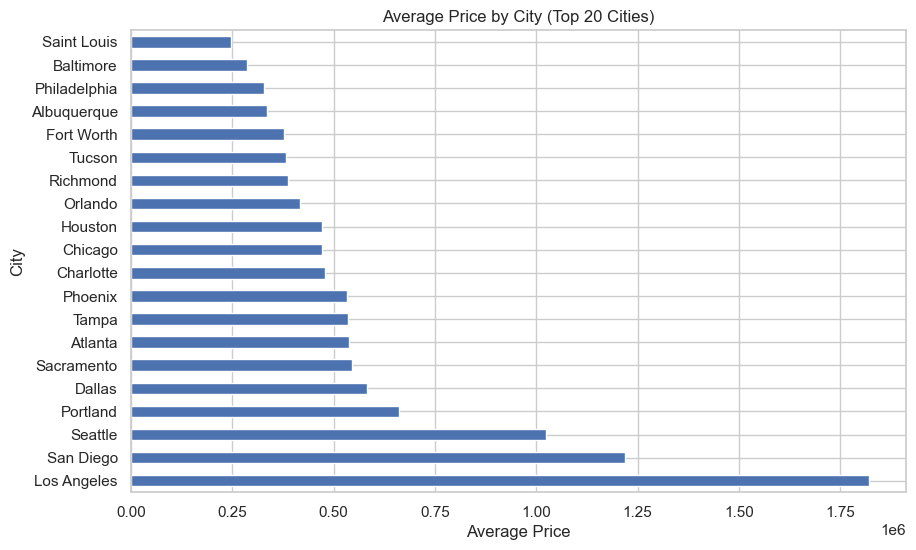

In [21]:
# Visualize the average price per city (Top 20 Cities)
top_20_cities = df_cleaned['city'].value_counts().head(20).index.tolist()
city_price = df_cleaned[df_cleaned['city'].isin(top_20_cities)].groupby('city')['price'].mean().sort_values(ascending=False)
city_price.plot(kind='barh', figsize=(10, 6))
plt.title('Average Price by City (Top 20 Cities)')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.show()


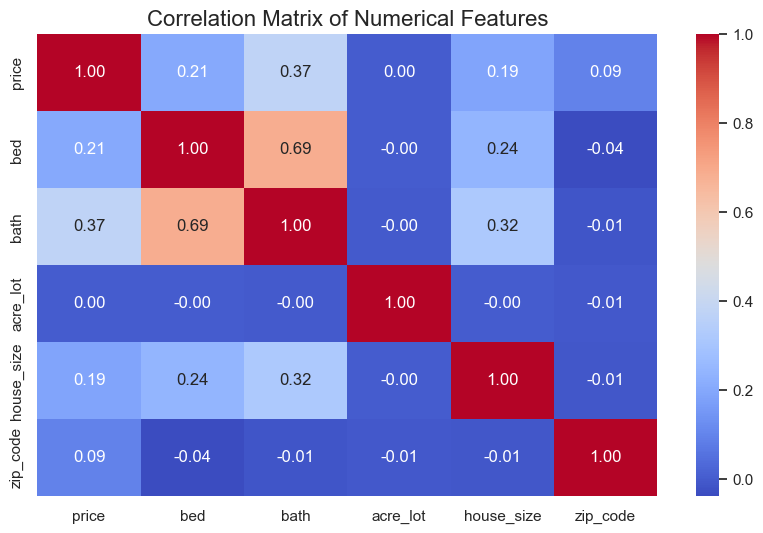

In [23]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [38]:
#Random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 2: Get the top 20 cities based on the number of listings
top_20_cities = df['city'].value_counts().head(30).index.tolist()

# Step 3: Filter the dataset to include only the top 20 cities
df_filtered = df_cleaned[df_cleaned['city'].isin(top_20_cities)]

# Step 4: Remove rows with missing target values (price)
df_filtered = df_filtered.dropna(subset=['price'])

# Step 5: Select the features (zip_code, house_size, bed, bath) and the target variable (price)
X = df_filtered[['zip_code', 'house_size', 'bed', 'bath','acre_lot','prev_sold_date','state','city','street','status'
]]  # Features
y = df_filtered['price']  # Target variable

# Step 6: Check if there are any missing values in the features or target
print("Missing values in features:")
print(X.isnull().sum())

print("Missing values in target variable (price):")
print(y.isnull().sum())

# Step 7: Preprocessing (Handle missing values in features and scale the features)
# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical data
            ('scaler', StandardScaler())  # Scale numerical features
        ]), ['zip_code', 'house_size', 'bed', 'bath'])
    ])

# Step 8: Define the Random Forest Regressor model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=1))  # Random Forest model
])

# Step 9: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 10: Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 11: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 12: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")




Missing values in features:
zip_code          0
house_size        0
bed               0
bath              0
acre_lot          0
prev_sold_date    0
state             0
city              0
street            0
status            0
dtype: int64
Missing values in target variable (price):
0
Mean Absolute Error: 147316.8089913023
R² Score: -3.077478344924952


In [32]:
#Gradient Boosting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 2: Get the top 20 cities based on the number of listings
top_20_cities = df['city'].value_counts().head(30).index.tolist()

# Step 3: Filter the dataset to include only the top 20 cities
df_filtered = df[df['city'].isin(top_20_cities)]

# Step 4: Remove rows with missing target values (price)
df_filtered = df_filtered.dropna(subset=['price'])

# Step 5: Select the features (zip_code, house_size, bed, bath) and the target variable (price)
X = df_filtered[['zip_code', 'house_size', 'bed', 'bath','acre_lot','prev_sold_date','state','city','street','status']]
y = df_filtered['price']  # Target variable

# Step 6: Check if there are any missing values in the features or target
print("Missing values in features:")
print(X.isnull().sum())

print("Missing values in target variable (price):")
print(y.isnull().sum())

# Step 7: Preprocessing (Handle missing values in features and scale the features)
# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical data
            ('scaler', StandardScaler())  # Scale numerical features
        ]), ['zip_code', 'house_size', 'bed', 'bath'])
    ])

# Step 8: Define the Gradient Boosting model
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=1))  # Gradient Boosting model
])

# Step 9: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 10: Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Step 11: Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Step 12: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - Mean Absolute Error: {mae}")
print(f"Gradient Boosting - R² Score: {r2}")





Missing values in features:
zip_code              4
house_size        41380
bed               32117
bath              32054
acre_lot          64081
prev_sold_date    49512
state                 0
city                  0
street             1898
status                0
dtype: int64
Missing values in target variable (price):
0
Gradient Boosting - Mean Absolute Error: 298638.8791237278
Gradient Boosting - R² Score: -0.39550174404622607


In [36]:
#KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 2: Get the top 20 cities based on the number of listings
top_20_cities = df['city'].value_counts().head(30).index.tolist()

# Step 3: Filter the dataset to include only the top 20 cities
df_filtered = df[df['city'].isin(top_20_cities)]

# Step 4: Remove rows with missing target values (price)
df_filtered = df_filtered.dropna(subset=['price'])

# Step 5: Select the features (zip_code, house_size, bed, bath) and the target variable (price)
X = df_filtered[['zip_code', 'house_size', 'bed', 'bath','acre_lot','prev_sold_date','state','city','street','status']]
y = df_filtered['price']  # Target variable

# Step 6: Check if there are any missing values in the features or target
print("Missing values in features:")
print(X.isnull().sum())

print("Missing values in target variable (price):")
print(y.isnull().sum())

# Step 7: Preprocessing (Handle missing values in features and scale the features)
# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical data
            ('scaler', StandardScaler())  # Scale numerical features
        ]), ['zip_code', 'house_size', 'bed', 'bath'])
    ])

# Step 8: Define the KNN model (K-Nearest Neighbors)
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # KNN model with 5 neighbors
])

# Step 9: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 10: Train the KNN model
knn_model.fit(X_train, y_train)

# Step 11: Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Step 12: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN - Mean Absolute Error: {mae}")
print(f"KNN - R² Score: {r2}")




Missing values in features:
zip_code              4
house_size        41380
bed               32117
bath              32054
acre_lot          64081
prev_sold_date    49512
state                 0
city                  0
street             1898
status                0
dtype: int64
Missing values in target variable (price):
0
KNN - Mean Absolute Error: 253590.55849262697
KNN - R² Score: 0.4033982367476455
